In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

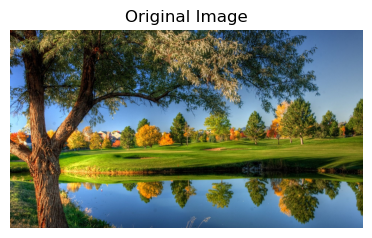

In [2]:
image = cv2.imread('Nature-.jpg')

# Convert image to RGB (OpenCV uses BGR by default)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#-1 means all 1920x1080 pixels will be stored flattened into a list and 3 means RGB
#thus each row of 2D pixels array has size 3 storing RGB data for the 2073600 pixels in the original image
pixels = image.reshape(-1, 3)

#Displaying original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.show()

In [3]:
class KMeans:
    def __init__(self, k):
        self.k = k
        self.maxIterations = 100


    def __getDistances(self, pixels, centroids):
        #centroids has length k, we need to expand it so we can get differences against each point
        centroidsExpanded = centroids[:, np.newaxis]

        #value differences between each point and each centroid
        differences = pixels - centroidsExpanded

        #Euclidean distances between each point and each centroid
        distances = np.linalg.norm(differences, axis=2)

        return distances


    def __checkConvergence(self, centroids, newCentroids):
        #allcloser() returns True if all elements of 2 arrays are almost equal (tolerance can be specified)
        if np.allclose(centroids, newCentroids):
            return True
        return False


    #train model using this function
    def fit(self, pixels):

        #k centroids are randomly chosen at the start
        centroids = pixels[np.random.choice(pixels.shape[0], k, replace=False)]

        for iteration in range(self.maxIterations):
            distances = self.__getDistances(pixels, centroids)

            #we assign each data point to its nearest centroid
            labels = np.argmin(distances, axis=0)

            #update centroids
            newCentroids = np.array([pixels[labels == i].mean(axis=0) for i in range(k)])

            #check if change in centroids has stopped
            if (self.__checkConvergence(centroids, newCentroids) == True):
                break

            centroids = newCentroids

        #so we can access these out of the class
        self.labels_ = labels
        self.cluster_centers_ = centroids
        self.distances = distances

    def predict(self, X):
        distances = np.linalg.norm(X - self.cluster_centers_[:, np.newaxis], axis=2)
        return np.argmin(distances, axis=0)

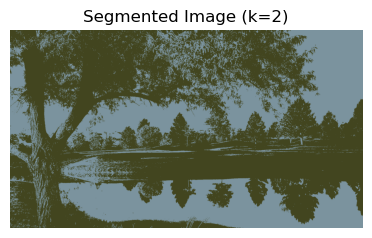

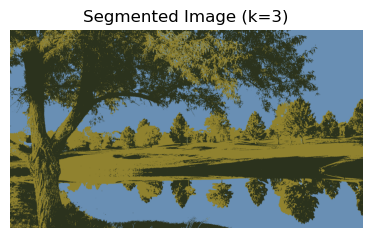

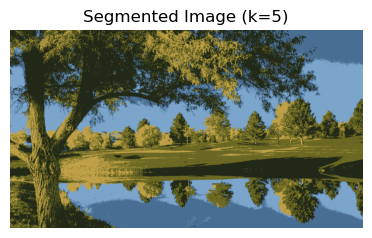

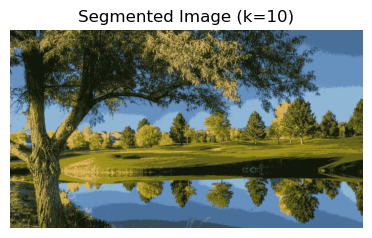

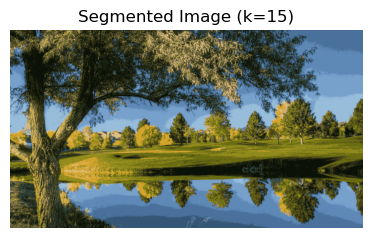

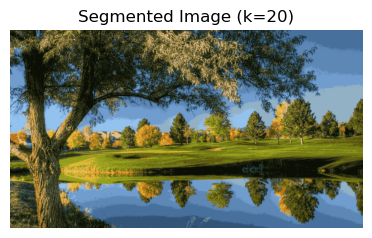

In [4]:
def getDistortionAndInertia(pixels, kmeans):

    #axis 0 represents the centroids; we want distance of each point to its nearest centroid
    minDistEach = np.min(kmeans.distances, axis=0)

    #it is sum of distance of each point to its nearest centroid
    inertia = sum(minDistEach)

    #average of sum of minimum distances gives distortion
    distortion = inertia  / pixels.shape[0]

    return inertia, distortion


kValues = [2,3,5,10,15,20]

models = []

inertias = []
distortions = []


for k in kValues:
    kmeans = KMeans(k = k)
    kmeans.fit(pixels)


    inertia, distortion = getDistortionAndInertia(pixels, kmeans)

    distortions.append(distortion)
    inertias.append(inertia)


    models.append(kmeans)

    # Get the cluster labels
    labels = kmeans.labels_

    # Replace each pixel with its corresponding centroid color
    segmented_image = kmeans.cluster_centers_[labels].reshape(image.shape)

    # Display the segmented images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image.astype(np.uint8))
    plt.title('Segmented Image (k={})'.format(k))
    plt.axis('off')

    plt.show()


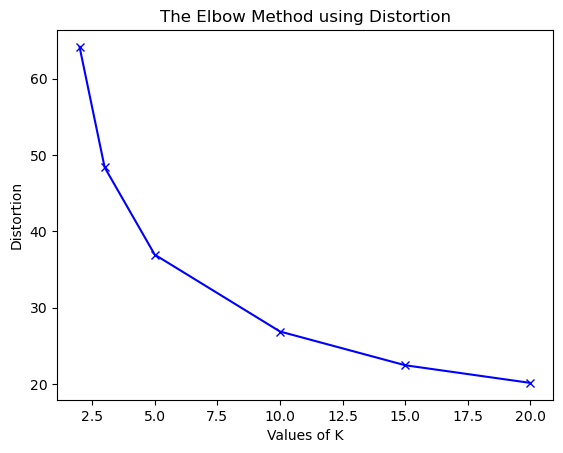

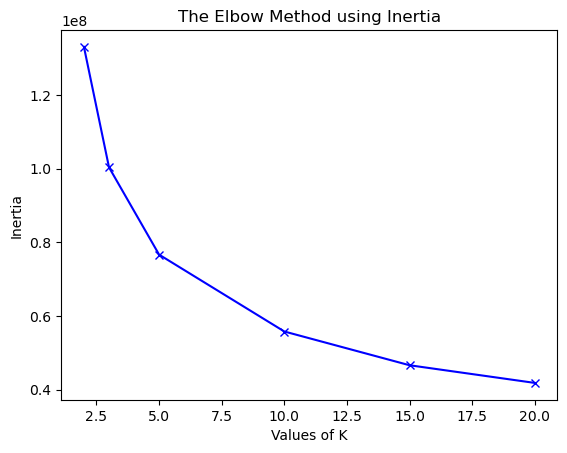

In [6]:
#For each k value, we calculate the within-cluster sum of squares (WCSS) value.
#WCSS is the sum of square distances between the centroids and each point.

#Both distortion and inertia can be considered as measures of the "cost" of clustering.


plt.plot(kValues, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


plt.plot(kValues, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()